# Lennard-Jones Equation of State 

The implementation aligns with the following literature:

[1] M. Thol, G. Rutkai, A. Köster, R. Lustig, R. Span, and J. Vrabec, “Equation of
state for the Lennard-Jones fluid,” J. Phys. Chem. Ref. Data 45, 023101 (2016).

In [1]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt
%matplotlib notebook 
from matplotlib.ticker import MultipleLocator
from scipy import exp, log
import sys
import pandas as pd

In [2]:
#import hyperdual lib. for numerical derivations (PyHD) 
#from e.g. https://github.com/anandpratap/PyHD.git
sys.path.append('/Users/marc/UNI/python/PyHD/build/lib.macosx-10.9-x86_64-3.7/hyperdual/') 
from numpy_hyperdual import hyperdual

# Reference data

The vapor-liquid reference data are taken from the following literature:

[2] J. Stoll, J. Vrabec, H. Hasse "Comprehensive study of the vapour–liquid equilibria of the pure two-centre Lennard–Jones plus pointdipole fluid", Fluid Ph. Equilibria 209(1), 29-53 (2003) 

In [3]:
file = '../reference_data/VLE.pic'
fileObj = open(file,'rb')
vle_ref = pickle.load(fileObj)
fileObj.close()

vle_ref[:2]

,$\rho_{l}^*$,$\rho_{v}^*$,$T^*$,$p_s^*$,$\mu^{*2}$,$\rho_{c}^*$,$T_{c}^*$,$Z_{v}$,$Z_{l}$
0,0.315783,0.315783,1.303702,0.119323,0.0,0.315783,1.303702,0.28984,0.289840
1,0.436458,0.199068,1.288223,0.112161,0.0,0.315783,1.303702,0.43737,0.199485


NIST reference data is taken from:

[3] https://mmlapps.nist.gov/srs/LJ_PURE/mc.htm

In [4]:
NIST = pd.read_csv('../reference_data/NIST.dat',sep=' ',header=0)
NIST[:2]

#mc_ref.columns

,temperature,density,internal_energy,error,pressure,error.1
0,0.85,0.001,-0.010317,0.000023,0.000844,4.660000e-08
1,0.85,0.003,-0.031019,0.000059,0.002497,4.990000e-07


## EoS Parameters

In [4]:
BasisFunPar = np.zeros((23,9))
# n
BasisFunPar[0][1]=0.005208073 
BasisFunPar[1][1]=2.186252000 
BasisFunPar[2][1]=-2.161016000 
BasisFunPar[3][1]=1.452700000 
BasisFunPar[4][1]=-2.041792000 
BasisFunPar[5][1]=0.186952860 
BasisFunPar[6][1]=-0.090988445 
BasisFunPar[7][1]=-0.497456100 
BasisFunPar[8][1]=0.109014310 
BasisFunPar[9][1]=-0.800559220 
BasisFunPar[10][1]=-0.568839000 
BasisFunPar[11][1]=-0.620862500 
BasisFunPar[12][1]=-1.466717700 
BasisFunPar[13][1]=1.891469000 
BasisFunPar[14][1]=-0.138370100 
BasisFunPar[15][1]=-0.386964500 
BasisFunPar[16][1]=0.126570200 
BasisFunPar[17][1]=0.605781000 
BasisFunPar[18][1]=1.179189000 
BasisFunPar[19][1]=-0.477326790 
BasisFunPar[20][1]=-9.921857500 
BasisFunPar[21][1]=-0.574793200 
BasisFunPar[22][1]=0.003772923 
# t
BasisFunPar[0][2]=1.000 
BasisFunPar[1][2]=0.320 
BasisFunPar[2][2]=0.505 
BasisFunPar[3][2]=0.672 
BasisFunPar[4][2]=0.843 
BasisFunPar[5][2]=0.898 
BasisFunPar[6][2]=1.294 
BasisFunPar[7][2]=2.590 
BasisFunPar[8][2]=1.786 
BasisFunPar[9][2]=2.770 
BasisFunPar[10][2]=1.786 
BasisFunPar[11][2]=1.205 
BasisFunPar[12][2]=2.830 
BasisFunPar[13][2]=2.548 
BasisFunPar[14][2]=4.650 
BasisFunPar[15][2]=1.385 
BasisFunPar[16][2]=1.460 
BasisFunPar[17][2]=1.351 
BasisFunPar[18][2]=0.660 
BasisFunPar[19][2]=1.496 
BasisFunPar[20][2]=1.830 
BasisFunPar[21][2]=1.616 
BasisFunPar[22][2]=4.970 
# d
BasisFunPar[0][3]=4.0 
BasisFunPar[1][3]=1.0 
BasisFunPar[2][3]=1.0 
BasisFunPar[3][3]=2.0 
BasisFunPar[4][3]=2.0 
BasisFunPar[5][3]=3.0 
BasisFunPar[6][3]=5.0 
BasisFunPar[7][3]=2.0 
BasisFunPar[8][3]=2.0 
BasisFunPar[9][3]=3.0 
BasisFunPar[10][3]=1.0 
BasisFunPar[11][3]=1.0 
BasisFunPar[12][3]=1.0 
BasisFunPar[13][3]=1.0 
BasisFunPar[14][3]=2.0 
BasisFunPar[15][3]=3.0 
BasisFunPar[16][3]=3.0 
BasisFunPar[17][3]=2.0 
BasisFunPar[18][3]=1.0 
BasisFunPar[19][3]=2.0 
BasisFunPar[20][3]=3.0 
BasisFunPar[21][3]=1.0 
BasisFunPar[22][3]=1.0 
# l
BasisFunPar[0][4]=0.0 
BasisFunPar[1][4]=0.0 
BasisFunPar[2][4]=0.0 
BasisFunPar[3][4]=0.0 
BasisFunPar[4][4]=0.0 
BasisFunPar[5][4]=0.0 
BasisFunPar[6][4]=1.0 
BasisFunPar[7][4]=2.0 
BasisFunPar[8][4]=1.0 
BasisFunPar[9][4]=2.0 
BasisFunPar[10][4]=2.0 
BasisFunPar[11][4]=1.0 
BasisFunPar[12][4]=0.0 
BasisFunPar[13][4]=0.0 
BasisFunPar[14][4]=0.0 
BasisFunPar[15][4]=0.0 
BasisFunPar[16][4]=0.0 
BasisFunPar[17][4]=0.0 
BasisFunPar[18][4]=0.0 
BasisFunPar[19][4]=0.0 
BasisFunPar[20][4]=0.0 
BasisFunPar[21][4]=0.0 
BasisFunPar[22][4]=0.0 
# eta
BasisFunPar[0][5]=0 
BasisFunPar[1][5]=0 
BasisFunPar[2][5]=0 
BasisFunPar[3][5]=0 
BasisFunPar[4][5]=0 
BasisFunPar[5][5]=0 
BasisFunPar[6][5]=0 
BasisFunPar[7][5]=0 
BasisFunPar[8][5]=0 
BasisFunPar[9][5]=0 
BasisFunPar[10][5]=0 
BasisFunPar[11][5]=0 
BasisFunPar[12][5]=2.067 
BasisFunPar[13][5]=1.522 
BasisFunPar[14][5]=8.82 
BasisFunPar[15][5]=1.722 
BasisFunPar[16][5]=0.679 
BasisFunPar[17][5]=1.883 
BasisFunPar[18][5]=3.925 
BasisFunPar[19][5]=2.461 
BasisFunPar[20][5]=28.2 
BasisFunPar[21][5]=0.753 
BasisFunPar[22][5]=0.82 
# beta
BasisFunPar[0][6]=0 
BasisFunPar[1][6]=0 
BasisFunPar[2][6]=0 
BasisFunPar[3][6]=0 
BasisFunPar[4][6]=0 
BasisFunPar[5][6]=0 
BasisFunPar[6][6]=0 
BasisFunPar[7][6]=0 
BasisFunPar[8][6]=0 
BasisFunPar[9][6]=0 
BasisFunPar[10][6]=0 
BasisFunPar[11][6]=0 
BasisFunPar[12][6]=0.625 
BasisFunPar[13][6]=0.638 
BasisFunPar[14][6]=3.91 
BasisFunPar[15][6]=0.156 
BasisFunPar[16][6]=0.157 
BasisFunPar[17][6]=0.153 
BasisFunPar[18][6]=1.16 
BasisFunPar[19][6]=1.73 
BasisFunPar[20][6]=383 
BasisFunPar[21][6]=0.112 
BasisFunPar[22][6]=0.119 
# gamma
BasisFunPar[0][7]=0 
BasisFunPar[1][7]=0 
BasisFunPar[2][7]=0 
BasisFunPar[3][7]=0 
BasisFunPar[4][7]=0 
BasisFunPar[5][7]=0 
BasisFunPar[6][7]=0 
BasisFunPar[7][7]=0 
BasisFunPar[8][7]=0 
BasisFunPar[9][7]=0 
BasisFunPar[10][7]=0 
BasisFunPar[11][7]=0 
BasisFunPar[12][7]=0.71 
BasisFunPar[13][7]=0.86 
BasisFunPar[14][7]=1.94 
BasisFunPar[15][7]=1.48 
BasisFunPar[16][7]=1.49 
BasisFunPar[17][7]=1.945 
BasisFunPar[18][7]=3.02 
BasisFunPar[19][7]=1.11 
BasisFunPar[20][7]=1.17 
BasisFunPar[21][7]=1.33 
BasisFunPar[22][7]=0.24 
# epsilon
BasisFunPar[0][8]=0 
BasisFunPar[1][8]=0 
BasisFunPar[2][8]=0 
BasisFunPar[3][8]=0 
BasisFunPar[4][8]=0 
BasisFunPar[5][8]=0 
BasisFunPar[6][8]=0 
BasisFunPar[7][8]=0 
BasisFunPar[8][8]=0 
BasisFunPar[9][8]=0 
BasisFunPar[10][8]=0 
BasisFunPar[11][8]=0 
BasisFunPar[12][8]=0.2053 
BasisFunPar[13][8]=0.409 
BasisFunPar[14][8]=0.6 
BasisFunPar[15][8]=1.203 
BasisFunPar[16][8]=1.829 
BasisFunPar[17][8]=1.397 
BasisFunPar[18][8]=1.39 
BasisFunPar[19][8]=0.539 
BasisFunPar[20][8]=0.934 
BasisFunPar[21][8]=2.369 
BasisFunPar[22][8]=2.43 

## EoS is written in terms of the reduced Helmholtz energy

In [5]:
def thol_EOS(rho,temp,iG=False):
    """
        LJ-EoS: 
            rho,temp = reduced density, reduced temperature
            
            iG: ideal gas contribution, which is not computed per default. 
            
            returns Helmholtz energy per particle and per k·T: A/(N·k·T) 
            
    """
    Tc, rhoc = 1.32,0.31
    tau, delta = Tc/temp, rho/rhoc
    
    if iG:  
        c1,c2 = -1.515151515, 6.262265814 
        a0 = np.log(delta) + 1.5*tau + c1*tau + c2
    
    ar = 0.
    for i in range(6):
        ni,ti,di = BasisFunPar[i,1], BasisFunPar[i,2], BasisFunPar[i,3]
        ar += ni*delta**di*tau**ti
    for i in range(12-7+1):
        ni,ti,di,li = BasisFunPar[i+6,1], BasisFunPar[i+6,2], BasisFunPar[i+6,3], BasisFunPar[i+6,4]
        ar += ni*delta**di*tau**ti*np.exp(-delta**li)
    for i in range(23-13+1):
        ni,ti,di,etai,epsi,gammai,betai = BasisFunPar[i+12,1], BasisFunPar[i+12,2], BasisFunPar[i+12,3],\
                                          BasisFunPar[i+12,5], BasisFunPar[i+12,8], BasisFunPar[i+12,7],\
                                          BasisFunPar[i+12,6]
        ar += ni*delta**di*tau**ti*np.exp(-etai*(delta-epsi)**2-betai*(tau-gammai)**2)
        #print(i+1+12,ni,ti,di,'etai',etai,epsi,gammai,betai)
    if iG:  a = (a0 + ar)
    if not iG: a = ar 
    return a

## computation of some thermodyn. quantities 

In [153]:
#state point
rrho = .82  # reduced density ρ* = ρσ^3
rT = 0.9   # reduced temperature T* = kT/ε

In [154]:
#EoS
a_hdn = thol_EOS(hyperdual(rrho,1.,0.,0.),hyperdual(rT,0.,1.,0.))
a = a_hdn.f0        # Helmholtz energy A/NKT
s = -rT*a_hdn.f2-a  # Entropy S/NK
u = -rT*a_hdn.f2    # Internal energy U/NKT

p = rrho**2*a_hdn.f1*rT                   # pressure: pσ^3/ɛ without iG-contribution  
ptot = p+rT*rrho                          # pressure: pσ^3/ɛ with iG-contribution 
Ztot = 1. + rrho*a_hdn.f1                 # compressibility factor
ptot_2 = rrho * (1. + rrho*a_hdn.f1)      # p/KT with iG-contribution 

cv = 2.*u - rT**2*thol_EOS(rrho,hyperdual(rT,1.,1.,0.)).f12  # isochoric heat capacity
#a, u, s, cv, p, ptot, Ztot, ptot_2

#reference data
U_ref = NIST[(NIST['density']==rrho) & (NIST['temperature']==rT)]['internal_energy']
p_ref = NIST[(NIST['density']==rrho) & (NIST['temperature']==rT)]['pressure']

print('%-8s %3.3f'%('A/NKT',a), 
      '\n%-8s %3.3f'%('U/NKT',u), ', reference: %-8s %3.3f'%('U/NKT',U_ref/rT), 
      '\n%-8s %3.3f'%('S/NK',s), 
      '\n%-8s %3.3f'%('C_v/NK',cv), '\n%-8s %3.3f %10s'%('pσ^3/ɛ',p, '(residual)'), 
      '\n%-8s %3.3f'%('pσ^3/ɛ',ptot), ', reference: %-8s %3.3f'%('pσ^3/ɛ',p_ref))  

A/NKT    -3.196 
U/NKT    -6.385 , reference: U/NKT    -6.384 
S/NK     -3.189 
C_v/NK   0.967 
pσ^3/ɛ   0.086 (residual) 
pσ^3/ɛ   0.824 , reference: pσ^3/ɛ   0.824


## vapor liquid state points

In [125]:
def AZresP_f(rrho, Temp): 
        """  
        input: 
            rrho: reduced density 
            Temp: reduced temperature
            
        returns: 
            A_tot/NKT, Z_res, p/KT
        
        """
         
        #LJ 
        a_hdn = thol_EOS(hyperdual(rrho,1.,0.,0.),hyperdual(Temp,0.,1.,0.))   
        Ztot = 1. + rrho * a_hdn.f1
        Atot = a_hdn.f0   
        ptot = rrho * Ztot
           
        return Atot, Ztot - 1., ptot

In [141]:
def density_iter_f(rho_liqVap_init, p_soll, Temp):
    """
        density iteration
        
        input: 
            rho_liqVap_init: initial/start density
            p_soll: target value 
            Temp: reduced temperature
        
        returns: 
            succ: successfully calculated quantity (t/f) 
            rho_liqVap: density 
            ptot_calc: calc. pressure 
            Atot: free energy   
    """
    
    #find density  
    succ = False 
    for i in range(25):
        if i == 0: rho_liqVap = rho_liqVap_init 

        Atot, Z_res, ptot_calc = AZresP_f(rho_liqVap, Temp)
         
        if abs(1. - ptot_calc/p_soll) < 0.01: succ = True ; break 
  
        #central difference quotient
        hh = 1e-5
        rho_liqVap = rho_liqVap + hh  

        _, _, ptotph = AZresP_f(rho_liqVap, Temp)
         
        rho_liqVap = rho_liqVap - 2. * hh  
        
        _, _, ptotmh = AZresP_f(rho_liqVap, Temp)
   
        dp_drho = (ptotph - ptotmh) / hh / 2.  
        error = ptot_calc - p_soll 
        delta_rho = - error / dp_drho
 
        if abs( delta_rho ) >  1.:  
            delta_rho = .5 * np.sign( delta_rho ) # limit step size
        
        #no other special prevention steps are implemented so far (e.g. prevent stepping to rho < 0.0) 

        if abs( delta_rho ) < 1e-5: break
        rho_liqVap += delta_rho
         
    return succ, rho_liqVap, ptot_calc, Atot

In [149]:
def psat_f(Temp):
    """
        calc. saturated pressure 
        
        input: 
            Temp: temperature 
         
        returns: 
            succ: successfully calculated quantity (t/f)
            psat: saturated pressure 
            liquid_density: liquid density
            vapor_density: vapor density 
    """
    
    rho_liq_init = .95
    A_liq, _, p_liq = AZresP_f(rho_liq_init, Temp)
    
    rho_vap_init = 1.0e-2
    A_vap, _, p_liq = AZresP_f(rho_vap_init, Temp)
    
    liquid_density = rho_liq_init
    vapor_density = rho_vap_init
    
    pold = 0. ; succ = False ; succ_pliq = False ; succ_pvap = False
    for k in range(25):
        pnew = -(A_vap - A_liq + log(vapor_density / liquid_density)) / \
                        (1.0 / vapor_density - 1.0 / liquid_density)
        
        pnew = pnew  
        
        if succ_pliq and succ_pvap: 
            if min(abs(1. - pold/pnew), abs(pnew - pold)) < 1e-4: succ = True ; break 
        if pnew < 0.: pnew = 1e-3
         
        pold = pnew
        
        succ_pliq, liquid_density, _,_ = density_iter_f(rho_liq_init, pnew, Temp)
        
        A_liq, _, p_liq = AZresP_f(liquid_density, Temp)
        
        succ_pvap, vapor_density, _,_ = density_iter_f(rho_vap_init, pnew, Temp)
        
        A_vap, _, p_vap = AZresP_f(vapor_density, Temp)
             
    return succ, pnew, liquid_density, vapor_density, p_liq, p_vap

In [150]:
  
ptot_arr = [] ; temps = [] ; rho_liq_arr = [] ; rho_vap_arr = [] ; pressures = []
 
print('%-15s'*4 % ('Temp', 'psat', 'liquid_density', 'vapor_density'))
for Temp in np.linspace(.6,1.2,25): 
        
    succ, psat, liquid_density, vapor_density, p_liq, p_vap = psat_f(Temp)  
        
    if not succ: continue  
        
    print('%-15.5f'*4 %(Temp, psat, liquid_density, vapor_density))
    
    temps.append(Temp)
    rho_liq_arr.append(liquid_density)
    rho_vap_arr.append(vapor_density)
    pressures.append(psat)

Temp           psat           liquid_density vapor_density  
0.82500        0.00726        0.78777        0.00759        
0.85000        0.00896        0.77633        0.00954        
0.87500        0.01091        0.76466        0.01178        
0.90000        0.01312        0.75276        0.01428        
0.92500        0.01562        0.74058        0.01746        
0.95000        0.01841        0.72806        0.02093        
0.97500        0.02149        0.71515        0.02486        
1.00000        0.02489        0.70181        0.02938        
1.02500        0.02860        0.68795        0.03452        
1.05000        0.03264        0.67348        0.04029        
1.07500        0.03701        0.65831        0.04675        
1.10000        0.04173        0.64236        0.05415        
1.12500        0.04679        0.62516        0.06339        
1.15000        0.05219        0.60690        0.07327        
1.17500        0.05795        0.58718        0.08457        
1.20000        0.06406  

<IPython.core.display.Javascript object>


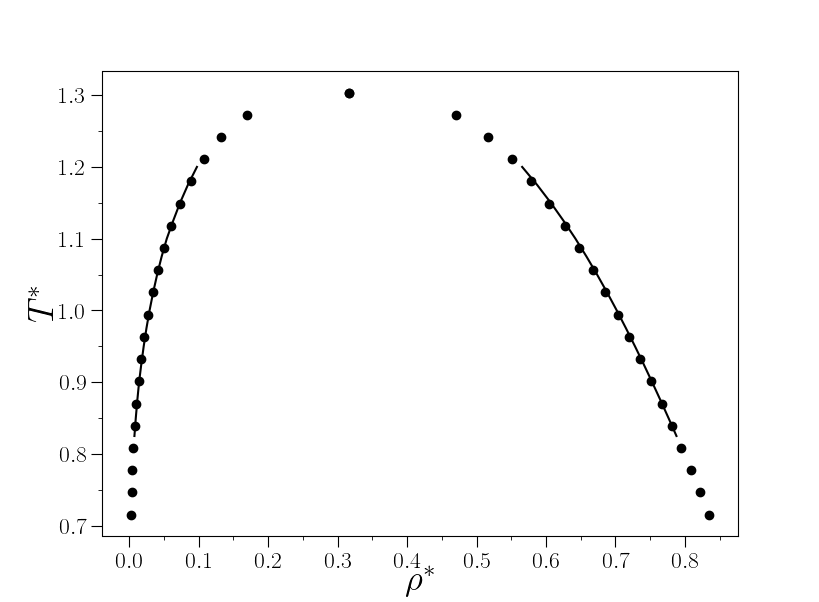

/Users/marc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/marc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/marc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuse

In [151]:
#----------------------------------------------------------------------------
#vle
#----------------------------------------------------------------------------
sze1 = 8.2
fignum = 11
plt.figure(fignum,figsize=(sze1,sze1/1.36)) 
 
plt.rc('text', usetex=True)
plt.rc('font', family='Helvetica')  
plt.rc('axes', labelsize=22)
    
plt.plot(rho_liq_arr, temps,'k-')
plt.plot(rho_vap_arr, temps,'k-')

plt.ylabel(r'$T^*$',size = 26, labelpad = -1) 
plt.xlabel(r'$\rho^*$',size=25.5, labelpad = -5)

plt.plot(vle_ref[vle_ref[r'$\mu^{*2}$']==0.][r'$\rho_{v}^*$'][::2], vle_ref[vle_ref[r'$\mu^{*2}$']==0.][r'$T^*$'][::2], 'ko')
plt.plot(vle_ref[vle_ref[r'$\mu^{*2}$']==0.][r'$\rho_{l}^*$'][::2], vle_ref[vle_ref[r'$\mu^{*2}$']==0.][r'$T^*$'][::2], 'ko')
   
major_x = MultipleLocator(.1)
minor_x = MultipleLocator(.05)
major_y = MultipleLocator(.1)
minor_y = MultipleLocator(.05)
plt.axes().xaxis.set_major_locator(major_x)
plt.axes().xaxis.set_minor_locator(minor_x)
plt.axes().yaxis.set_minor_locator(minor_y)
plt.axes().yaxis.set_major_locator(major_y)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.tick_params(axis='both', which='major', length=8)
plt.tick_params(axis='both', which='minor', length=3) 

<IPython.core.display.Javascript object>


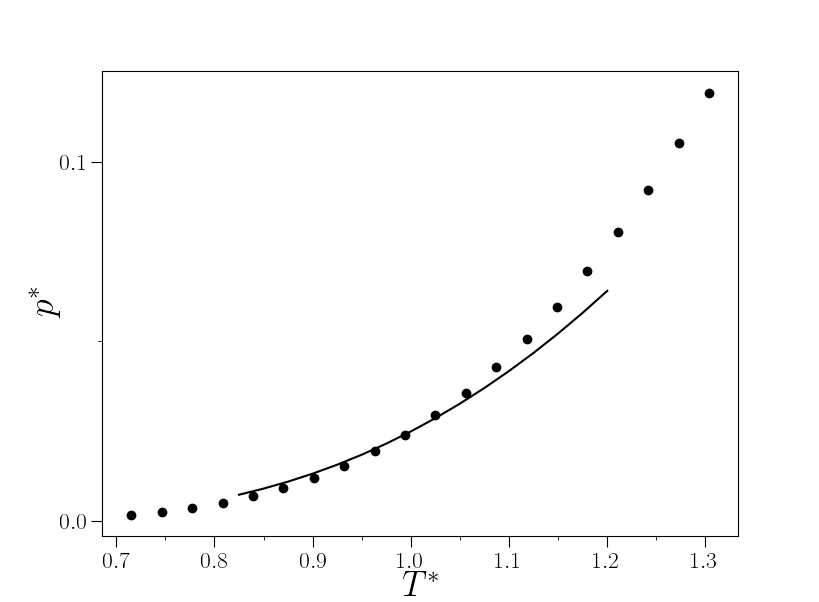

/Users/marc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/marc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/marc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuse

In [152]:
#----------------------------------------------------------------------------
#psat
#----------------------------------------------------------------------------
sze1 = 8.2
fignum = 12
plt.figure(fignum,figsize=(sze1,sze1/1.36)) 
 
plt.rc('text', usetex=True)
plt.rc('font', family='Helvetica')  
plt.rc('axes', labelsize=22)
    
plt.plot(temps, pressures, 'k-')
  
#plt.yscale('log')
 
plt.plot(vle_ref[vle_ref[r'$\mu^{*2}$']==0.][r'$T^*$'][::2], vle_ref[vle_ref[r'$\mu^{*2}$']==0.][r'$p_s^*$'][::2], 'ko')
    
plt.ylabel(r'$p^*$',size = 26, labelpad = -1) 
plt.xlabel(r'$T^*$',size=25.5, labelpad = -1)
 
major_x = MultipleLocator(.1)
minor_x = MultipleLocator(.05)
major_y = MultipleLocator(.1)
minor_y = MultipleLocator(.05)
plt.axes().xaxis.set_major_locator(major_x)
plt.axes().xaxis.set_minor_locator(minor_x)
plt.axes().yaxis.set_minor_locator(minor_y)
plt.axes().yaxis.set_major_locator(major_y)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.tick_params(axis='both', which='major', length=8)
plt.tick_params(axis='both', which='minor', length=3)